<a href="https://colab.research.google.com/github/zjminglead/BESTORE/blob/master/data_group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pwd

Mounted at /content/drive
/content


# 数据分组

- 数据分组就是根据一个或多个键（可以是函数、数组或df列名）将数据分成若干组
- 然后对分组后的数据分别进行汇总计算
- 并将汇总计算后的结果进行合并
- 被用作汇总计算的函数称为聚合函数。
- 数据分组的具体分组流程如下图所示：
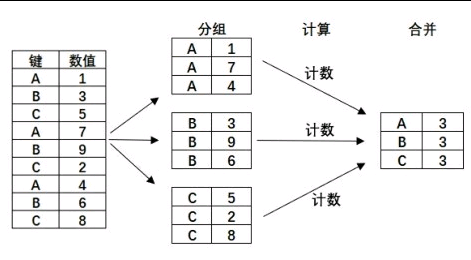
* 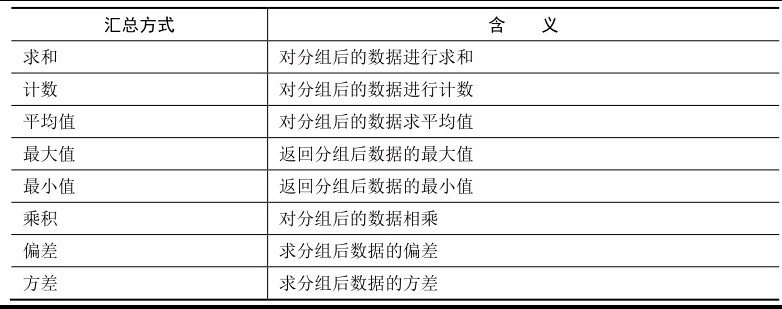




## 1.分组键是列名

- 分组键是列名时直接将某一列或多列的列名传给groupby()方法，groupby()方法就会按照这一列或多列进行分组。

### 按照一列进行分组

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/BESTROE/dataset/Mall_Customers.csv')

df.tail()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
df.groupby('Genre')

从上面的结果可以看出，如果只是传入列名，运行groupby()方法以后返回的不是一个DataFrame对象，而是一个DataFrameGroupBy对象，这个对象里面包含着分组以后的若干组数据，但是没有直接显示出来，需要对这些分组数据进行汇总计算以后才会展示出来。

In [ ]:
# 根据客户性别对所有数据进行分组，然后对分组以后的数据分别进行计数运算，最后进行合并。
df.groupby("Genre").count()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
Genre,,,,
Female,112,112,112,112
Male,88,88,88,88


- 由于对分组后的数据进行了计数运算，因此每一列都会有一个结果
- 但是如果对分组后的结果做一些数值运算，这个时候就只有数据类型是数值（int、float）的列才会参与运算，比如下面的求和运算。

In [ ]:
df.groupby('CustomerID').sum()

,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,
1,19,15,39
2,21,15,81
3,20,16,6
4,23,16,77
5,31,17,40
...,...,...,...
196,35,120,79
197,45,126,28
198,32,126,74


我们把这种对分组后的数据进行汇总运算的操作称为聚合，使用的函数称为聚合函数

### 按照多列进行分组

- 上面分组键是某一列，即按照一列进行分组，也可以按照多列进行分组
- 只要将多个列名以**列表**的形式传给groupby()即可，汇总计算方式与按照单列进行分组以后数据运算的方式一致。

In [ ]:
# 对分组的数据进行计算运算
df.groupby(['Genre','Age']).count()

CustomerID  Annual_Income_(k$)  Spending_Score
Genre  Age                                                
Female 18            1                   1               1
       19            2                   2               2
       20            2                   2               2
       21            4                   4               4
       22            2                   2               2
...                ...                 ...             ...
Male   66            1                   1               1
       67            3                   3               3
       68            1                   1               1
       69            1                   1               1
       70            2                   2               2

[87 rows x 3 columns]

In [ ]:
# 对分组后的数据进行求和运算
df.groupby(['Genre','Age']).sum()

CustomerID  Annual_Income_(k$)  Spending_Score
Genre  Age                                                
Female 18          115                  65              48
       19          228                 128             104
       20           43                  53              81
       21          259                 179             253
       22           94                  74             131
...                ...                 ...             ...
Male   66          110                  63              48
       67          197                 135             114
       68          109                  63              43
       69           58                  44              46
       70          132                  95             111

[87 rows x 3 columns]

- 无论分组键是一列还是多列，只要直接在分组后的数据上进行汇总计算，就是对所有可以计算的列进行计算。
- 有的时候我们不需要对所有列进行计算，这个时候就可以把想要计算的列（可以是单列，也可以是多列）
- 通过索引的方式取出来，然后在取出来这列数据的基础上进行汇总计算。

In [ ]:
df.groupby('Genre')['Spending_Score'].count()

Genre
Female    112
Male       88
Name: Spending_Score, dtype: int64

## 2.分组键是Series

- 把DataFrame的其中一列取出来就是一个Series，比如下面的df["Genre"]就是一个Series。


In [ ]:
df['Genre']

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Genre, Length: 200, dtype: object

- 分组键是列名与分组键是Series的唯一区别就是，给groupby()方法传入了什么，其他都一样。
- 可以按照一个或多个Series进行分组，分组以后的汇总计算也是完全一样的，也支持对分组以后的某些列进行汇总计算。

### 按照一个Series进行分组

In [ ]:
# 对分组以后的数据进行计数运算
df.groupby(df['Age']).count()

,CustomerID,Genre,Annual_Income_(k$),Spending_Score
Age,,,,
18,4,4,4,4
19,8,8,8,8
20,5,5,5,5
21,5,5,5,5
22,3,3,3,3
23,6,6,6,6
24,4,4,4,4
25,3,3,3,3
26,2,2,2,2


### 按照多个Series进行分组

In [ ]:
# 对分组以后的数据进行求和运算
df.groupby([df['Age'], df['CustomerID']]).sum()

Annual_Income_(k$)  Spending_Score
Age CustomerID                                    
18  34                          33              92
    66                          48              59
    92                          59              41
    115                         65              48
19  1                           15              39
...                            ...             ...
68  91                          59              55
    109                         63              43
69  58                          44              46
70  61                          46              56
    71                          49              55

[200 rows x 2 columns]

## 3.aggregate方法

- 前面用到的聚合函数都是直接在DataFrameGroupBy上调用的，这样分组以后所有列做的都是同一种汇总运算，**且一次只能使用一种汇总方式。**

- aggregate的第一个神奇之处在于，**一次可以使用多种汇总方式**，比如下面的例子先对分组后的所有列做计数汇总运算，然后对所有列做求和汇总运算。

- aggregate的第二个神奇之处在于，可以针对不同的列做不同的汇总运算，

In [ ]:
df.groupby('Genre').aggregate(['count','sum'])

CustomerID          Age  ... Annual_Income_(k$) Spending_Score      
            count    sum count  ...                sum          count   sum
Genre                           ...                                        
Female        112  10927   112  ...               6636            112  5771
Male           88   9173    88  ...               5476             88  4269

[2 rows x 8 columns]

In [ ]:
df.groupby('Genre').aggregate({'Age':'count', 'Spending_Score': 'sum'})

,Age,Spending_Score
Genre,,
Female,112,5771
Male,88,4269


## 4.对分组后的结果重置索引

- 通过上节代码运行的结果可以看出，DataFrameGroupBy 对象经过汇总运算以后的形式并不是标准的DataFrame形式。

- 为了接下来对分组结果进行进一步处理与分析，我们需要把非标准形式转化为标准的 DataFrame 形式

- 利用的方法就是重置索引reset_index()方法

In [ ]:
df.groupby('Age').sum()

,CustomerID,Annual_Income_(k$),Spending_Score
Age,,,
18,307,205,240
19,776,456,318
20,296,208,201
21,261,194,334
22,110,94,210
23,347,249,380
24,198,157,286
25,300,173,119
26,180,116,109


In [ ]:
df.groupby('Age').sum().reset_index()

,Age,CustomerID,Annual_Income_(k$),Spending_Score
0,18,307,205,240
1,19,776,456,318
2,20,296,208,201
3,21,261,194,334
4,22,110,94,210
5,23,347,249,380
6,24,198,157,286
7,25,300,173,119
8,26,180,116,109
9,27,660,379,362


# 数据透视表

- 数据透视表实现的功能与数据分组相类似但又不同
- 数据分组是在一维（行）方向上不断拆分
- 而数据透视表是在行、列方向上同时拆分。

**下图为数据分组与数据透视表的对比：**

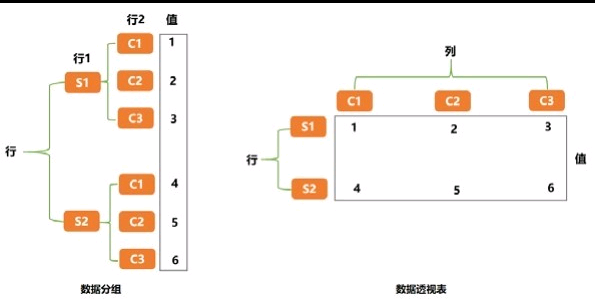


Python中数据透视表的制作原理与Excel中的制作原理是一样的。Python中的数据透视表用到的是pivot_table()方法。

**pivot_table()参数**



```
pd.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean',fill_value=None, margin=False, dropna=True, margin_name='ALL')
```



* data表示要做数据透视表的整个表
* values对应Excel中值那个框
* index对应Excel中行那个框
* columns对应Excel中列那个框
* aggfunc表示是否显示合计列
* dropna 表示是否删除缺失
* margins_name表示合计列的列名


示例：
* Genre作为Index
* Age作为columns
* Spending_Score作为values
* 对values执行count运算


In [ ]:
pd.pivot_table(df, values='Spending_Score', columns='Age',
               index='Genre', aggfunc='count')

Age,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,63,64,65,66,67,68,69,70
Genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Female,1.0,2.0,2.0,4.0,2.0,6.0,2.0,1.0,NaN,4.0,1.0,4.0,5.0,7.0,6.0,1.0,3.0,6.0,4.0,1.0,4.0,NaN,3.0,2.0,1.0,1.0,2.0,3.0,2.0,4.0,NaN,6.0,4.0,2.0,1.0,NaN,3.0,1.0,1.0,1.0,1.0,NaN,2.0,1.0,NaN,1.0,1.0,1.0,2.0,NaN,NaN
Male,3.0,6.0,3.0,1.0,1.0,NaN,2.0,2.0,2.0,2.0,3.0,1.0,2.0,1.0,5.0,2.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,NaN,1.0,2.0,NaN,NaN,1.0,2.0,5.0,1.0,1.0,NaN,1.0,2.0,1.0,NaN,NaN,1.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,2.0


上面的运行结果和Excel的不同之处就是没有合计列，Python数据透视表中的合计列默认是关闭的，让其等于True就可以显示出来，示例如下所示。

In [ ]:
pd.pivot_table(df, values='Spending_Score', columns='Age',
               index='Genre', aggfunc='count', margins=True)

Age,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,63,64,65,66,67,68,69,70,All
Genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Female,1.0,2.0,2.0,4.0,2.0,6.0,2.0,1.0,NaN,4.0,1.0,4.0,5.0,7.0,6.0,1.0,3.0,6.0,4.0,1.0,4.0,NaN,3.0,2.0,1.0,1.0,2.0,3.0,2.0,4.0,NaN,6.0,4.0,2.0,1.0,NaN,3.0,1.0,1.0,1.0,1.0,NaN,2.0,1.0,NaN,1.0,1.0,1.0,2.0,NaN,NaN,112
Male,3.0,6.0,3.0,1.0,1.0,NaN,2.0,2.0,2.0,2.0,3.0,1.0,2.0,1.0,5.0,2.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,NaN,1.0,2.0,NaN,NaN,1.0,2.0,5.0,1.0,1.0,NaN,1.0,2.0,1.0,NaN,NaN,1.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,2.0,88
All,4.0,8.0,5.0,5.0,3.0,6.0,4.0,3.0,2.0,6.0,4.0,5.0,7.0,8.0,11.0,3.0,5.0,9.0,6.0,3.0,6.0,3.0,6.0,2.0,2.0,3.0,2.0,3.0,3.0,6.0,5.0,7.0,5.0,2.0,2.0,2.0,4.0,1.0,1.0,2.0,2.0,4.0,3.0,2.0,1.0,2.0,2.0,4.0,3.0,1.0,2.0,200


合计列的名称默认为All，可以通过设置参数margins_name的值进行修改

In [ ]:
pd.pivot_table(df, values='Spending_Score', columns='Age',
               index='Genre', aggfunc='count', margins='总计')

NaN 表示缺失值，我们可以通过设置参数 fill_value 的值对缺失值进行填充

In [ ]:
pd.pivot_table(df, values='Spending_Score', columns='Age',
               index='Genre', aggfunc='count', margins='总计', fill_value = 0)

Age,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,63,64,65,66,67,68,69,70,All
Genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Female,1,2,2,4,2,6,2,1,0,4,1,4,5,7,6,1,3,6,4,1,4,0,3,2,1,1,2,3,2,4,0,6,4,2,1,0,3,1,1,1,1,0,2,1,0,1,1,1,2,0,0,112
Male,3,6,3,1,1,0,2,2,2,2,3,1,2,1,5,2,2,3,2,2,2,3,3,0,1,2,0,0,1,2,5,1,1,0,1,2,1,0,0,1,1,4,1,1,1,1,1,3,1,1,2,88
All,4,8,5,5,3,6,4,3,2,6,4,5,7,8,11,3,5,9,6,3,6,3,6,2,2,3,2,3,3,6,5,7,5,2,2,2,4,1,1,2,2,4,3,2,1,2,2,4,3,1,2,200


aggfunc 用来表示计算类型，当只传入一种类型时，表示对所有的值字段都进行同样的计算；如果需要对不同的值进行不同的计算类型，则需要传入一个字典，其中键为列名，值为计算方式。

In [ ]:
pd.pivot_table(df, values=['Spending_Score','Annual_Income_(k$)'], columns='Age',
               index='Genre', 
               aggfunc=({"Spending_Score":"count","Annual_Income_(k$)":"sum"}),
               margins='总计', fill_value = 0)

Annual_Income_(k$)                               ... Spending_Score                    
Age                    18   19   20   21  22   23   24  ...             65 66 67 68 69 70  All
Genre                                                   ...                                   
Female                 65  128   53  179  74  249   59  ...              1  1  1  2  0  0  112
Male                  140  328  155   15  20    0   98  ...              1  1  3  1  1  2   88
All                   205  456  208  194  94  249  157  ...              2  2  4  3  1  2  200

[3 rows x 104 columns]

为了便于分析与处理，我们一般会对数据透视表的结果重置索引，利用的方法同样是reset_index()。

In [ ]:
pd.pivot_table(df, values=['Spending_Score','Annual_Income_(k$)'], columns='Age',
               index='Genre', 
               aggfunc=({"Spending_Score":"count","Annual_Income_(k$)":"sum"}),
               margins='总计', fill_value = 0).reset_index()

Genre Annual_Income_(k$)                          ... Spending_Score                    
Age                         18   19   20   21  22   23  ...             65 66 67 68 69 70  All
0    Female                 65  128   53  179  74  249  ...              1  1  1  2  0  0  112
1      Male                140  328  155   15  20    0  ...              1  1  3  1  1  2   88
2       All                205  456  208  194  94  249  ...              2  2  4  3  1  2  200

[3 rows x 105 columns]